<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/week7/Walkthrough%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Walkthrough : Regression

Regression is to relate input variables to the output variable, to either predict outputs for new inputs and/or to understand the effect of the input on the output. In prediction, we wish to predict the output for a new input vector. In interpretation, we wish to under- stand the effect of inputs on output.

For both the goals, we need to find a function that approximates the output “well enough” given inputs:

$$y_n =f(\boldsymbol{x_{n}})$$

In python, a useful library exists to apply regression and other Machine Learning and statisticals tools over the data. It is the so called **sklearn**.

This walkthrough will teach you how to use this library in the context of regression.

In [0]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

## 1. Load the dataset


From this library we import the `LinearRegression` module and the differents datasets used for our examples. In this section, we will discuss the basics of using the linear model with the weather dataset as example. Then you will be given a task and perform your own linear regression.

In [33]:
#Load the dataset
url = "https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/weather.csv"
weather = pd.read_csv(url).drop_duplicates().dropna()
# Display a sample of the data
display(weather.head())
#Print the data types
print(weather.dtypes)
print("Data matrix shape: ", weather.shape)
# display the columns names
print("Columns names: ", weather.columns) 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object
Data matrix shape:  (328, 24)
Columns names:  Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'R

**Note:** The purpose here is to predict the temperature from other features (like humidity or pression). It is called multivariate linear regression when we use several features as input, univariate otherwise. We will work with values at **3pm** for simplicity.

A LinearRegression has this form for one feature: $$ Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$$

The betas correspond the weights (variables). Combined with the features ( matrix X) we want to predict the target variable (Y vector). The regression will compute the best value of $\beta_i$.

For now we will focus on a simple linear regression with **one feature variable**. We would like to know if we can use the humity to predict the temperature. Let's separate the feature input from the target output.

In [0]:
X = weather[['Humidity3pm']] 
y = weather[['Temp3pm']]

## 2. Splitting the dataset

Sklearn has a very useful module to seprate your dataset in a training and testing set. The training set will be used to retreive the best values of the weights according to a combination of input/output while the test set will be used to evaluate/predict our model. Since our model will be trained on particular values we want to test our data on a new set of data (the test set.

The test size here is of 20% of the original data.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)


**Note:** Generally you should normalize the data before splitting the datset. The normalization is important here to reduce the variance of our model and get better results. We skip this step for now.

The sklearn code use `MinMaxScaler` module to normalize the data. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.  

This is an example of how to use it:
```python
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
#Per feature maximum seen in the data
print(scaler.data_max_)
# Retur the scale features of X according to feature_range.
print(scaler.transform(data))

#These two steps can be merged into one shot by:
data = scaler.fit_transform(data)
```

## 3. Create/Fit the model

To predict the target variable we will use a simple linear regression. We can import the module like this (already done at the beginning of the file):

```python
from sklearn.linear_model import LinearRegression
```

In [36]:
# There are three steps to model something with sklearn
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score/accuracy
print("R^2 Score of the model: ", round(model.score(X_test, y_test), 3))


R^2 Score of the model:  0.372


**Note:** 
- We create a new LinearRegression model from sklearn
- The `fit()` function will fil the linear model from the X_train (features) and the y_train data (target)
- The ``score()``function returns the coefficient of determination R^2 of the prediction. he best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

After fitting the model, we can easily retreive the values of the different beta coefficients (the intercept, and the weight fro each feature).

In [37]:
print("Intercept: ", model.intercept_[0]) 
print("Features coefficients (weigths): ", model.coef_.flatten()[0])# Get the coefficients, beta

Intercept:  29.543003059769497
Features coefficients (weigths):  -0.22661055784458156


**Note:** Considering this linear equation: $ Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$
The intercept corresponds to the value of $\beta_0$ and there is one coefficient,  $\beta_1$ linked to the humity feature. Since we have only one value for intercept and coefficients represented as arrays, we apply `flattent()` and `[0]`.

## 4. Prediction/Evaluation

The model is trained, then we can use the ``predict()`` function to predict the values of the test set using `X_test`. This prediction can be compared to the truth value i.e `y_test`.

Here an example for one value prediction. Our model takes a matrix as inputs (X matrix), so even if we want to predict a sclar value we should use `[[...]]`.

In [38]:
print("Particular value of humidity: ", X_test.iloc[0].values)
#Compute the prediction for input 32 (humidity)
prediction = model.predict([[32]])
print("Prediction/Truth for humidity 32: ", prediction, y_test.iloc[0].values)

Particular value of humidity:  [28]
Prediction/Truth for humidity 32:  [[22.29146521]] [27.]


**Note:** Try to use `flatten()` and `[0]` in order to display correctly the above values.

## 5. Evaluation and plotting

To better understand why the prediction and actual value are different , we can plot the predictions (form a line) and the true values from the test set. It is more interesting to predict from the test set because our model is not trained on these values unlike the train set.

In [0]:
#Model prediction from X_test
predictions = model.predict(X_test)

We can compare the error of our model by using some metrics like the **MAE (mean absolute error)**, **MSE (mean squared error)** or **R^2** score. Sklearn offers to you some nice modules to compute directly these measures. These modules are imported at the begining of the file.

These two metrics takes the `y_true` values and the `predictions` as arguments. Basically it will analyse how much the prediction is far away from the true value.

In [40]:
# Compare the MAE the MSE and the R^2
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MAE %.2f" % mae)
print("MSE %.2f" % mse)
print("R^2 %.2f" % r2)

MAE 4.27
MSE 24.44
R^2 0.37


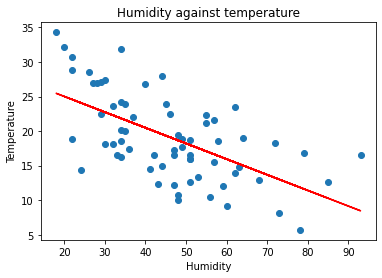

In [41]:
# Plot the prediction (the line) over the true value (the dots)
plt.scatter(X_test, y_test)
plt.plot(X_test, predictions, 'r')
plt.title("Humidity against temperature")
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

## 6. Multivariate variables

Now we will apply the same piece of code to several features. For instance it should be interesting to use: humidity, pressure, sunshine and cloud data.


In [42]:
# 1. Split the data by features and target
X = weather[['Humidity3pm', 'Cloud3pm', 'Pressure3pm', 'Sunshine']] 
y = weather[['Temp3pm']]
# 2. Split the data into a training a test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
# 3. Set up the model
model = LinearRegression()
# 4. Use fit
model.fit(X_train, y_train)
# 5. Print the coefficients of the linear model
print("Intercept: ", model.intercept_) 
print("Features coefficients (weigths): ", model.coef_)# Get the coefficients, beta

# 6.Prediction
print("Particular value of ['Humidity3pm', 'Cloud3pm', 'Pressure3pm', 'Sunshine']: ", X_test.iloc[0].values)
pred = model.predict([[ 28.0, 7.0, 1018.2, 7.3]])
print("Prediction/Truth for [ 28.0, 7.0, 1018.2, 7.3]: ", pred, y_test.iloc[0].values)
# 7. Evaluate the model over the test set
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MAE %.2f" % mae)
print("MSE %.2f" % mse)
print("R^2 %.2f" % r2)

Intercept:  [361.96448369]
Features coefficients (weigths):  [[-0.20850482  0.53595273 -0.33294024  0.39432442]]
Particular value of ['Humidity3pm', 'Cloud3pm', 'Pressure3pm', 'Sunshine']:  [  28.     7.  1018.2    7.3]
Prediction/Truth for [ 28.0, 7.0, 1018.2, 7.3]:  [[23.75683013]] [27.]
MAE 3.90
MSE 21.85
R^2 0.44
